# Kinetic Alfvén Dispersion Relation

[kinetic_alfvén]: ../../api_static/plasmapy.dispersion.numerical.kinetic_alfven_.rst
[bellan2012]: https://doi.org/10.1029/2012JA017856
[hasegawa1982]: https://doi.org/10.2172/5259641
[morales1997]: https://doi.org/10.1063/1.872531
[lotko1996]: https://doi.org/10.1029/95JA03712

This notebook details the functionality of the [kinetic_alfven()][kinetic_alfvén] function. This is a numerical solution to equation 5 in [Bellan 2012][bellan2012], the function is defined in [Morales 1997][morales1997] to be:

$$
         \omega^2 = k_{\rm z}^2 v_{\rm A}^2 \left(1 + \frac{k_{\rm x}^2
        c_{\rm s}^2}{\omega_{\rm ci}^2} \right)
$$

where $c_{\rm s}$ is the wave speed and $\omega_{\rm ci}$ as the gyrofrequency of the respective ion. Using the 2 × 2 matrix approach method from [Bellan 2012][bellan2012], this function computes the corresponding wave frequencies in units of rad / s. This approach comes from [Hasegawa 1982][hasegawa1982], [Morales 1997][morales1997] and [Lotko 1996][lotko1996]; who argued that a 3 × 3 matrix that describes warm plasma waves, is able to be represented as a 2 × 2 matrix because the compressional (i.e., fast) mode can be factored out. The result is that the determinant, when in the limit of $\omega \gg k_{z}^{2} c^{2}_{\rm s}$, reduces to the kinetic Alfvén dispersion relation.

<div class="alert alert-info">
Note

The regions in which this equation is valid are:

 * $\omega \ll \omega_{\rm ci}$
 * $\nu_{\rm Te} \gg \frac{\omega}{k_{z}} \gg \nu_{\rm Ti}$
 * There is no restriction on propagation angle.

with $\nu_{\rm Ti}$ standing for the thermal speed of the respective ion and is given as:

$$
        \nu_{\rm Ti} = \sqrt{\frac{3k_{\rm B}T_{\rm i}}{2 m_{\rm i}}}
$$

</div>

## Contents

1. [Wave Normal to the Surface](#Wave-normal-to-the-surface)

In [1]:
import numpy as np

from astropy import units as u
from matplotlib import pyplot as plt

from plasmapy.dispersion.numerical.kinetic_alfven_ import kinetic_alfven
from plasmapy.particles import Particle

plt.rcParams["figure.figsize"] = [10.5, 0.56 * 10.5]

## Wave Normal to the Surface

To calculate t

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[-180. -140. -100.  -60.  -20.   20.   60.  100.  140.  180.] deg
{-180.0: <Quantity [4.84402320e-03, 1.08629843e+33] rad / s>, -140.0: <Quantity [1.60113196e-03, 4.39326163e+32] rad / s>, -100.0: <Quantity [6.97973488e-03, 9.89306424e+32] rad / s>, -60.0: <Quantity [7.70896975e-03, 6.57739782e+32] rad / s>, -20.0: <Quantity [3.3030758e-03, 8.4409426e+32] rad / s>, 20.0: <Quantity [3.3030758e-03, 8.4409426e+32] rad / s>, 60.0: <Quantity [7.70896975e-03, 6.57739782e+32] rad / s>, 100.0: <Quantity [6.97973488e-03, 9.89306424e+32] rad / s>, 140.0: <Quantity [1.60113196e-03, 4.39326163e+32] rad / s>, 180.0: <Quantity [4.84402320e-03, 1.08629843e+33] rad / s>}


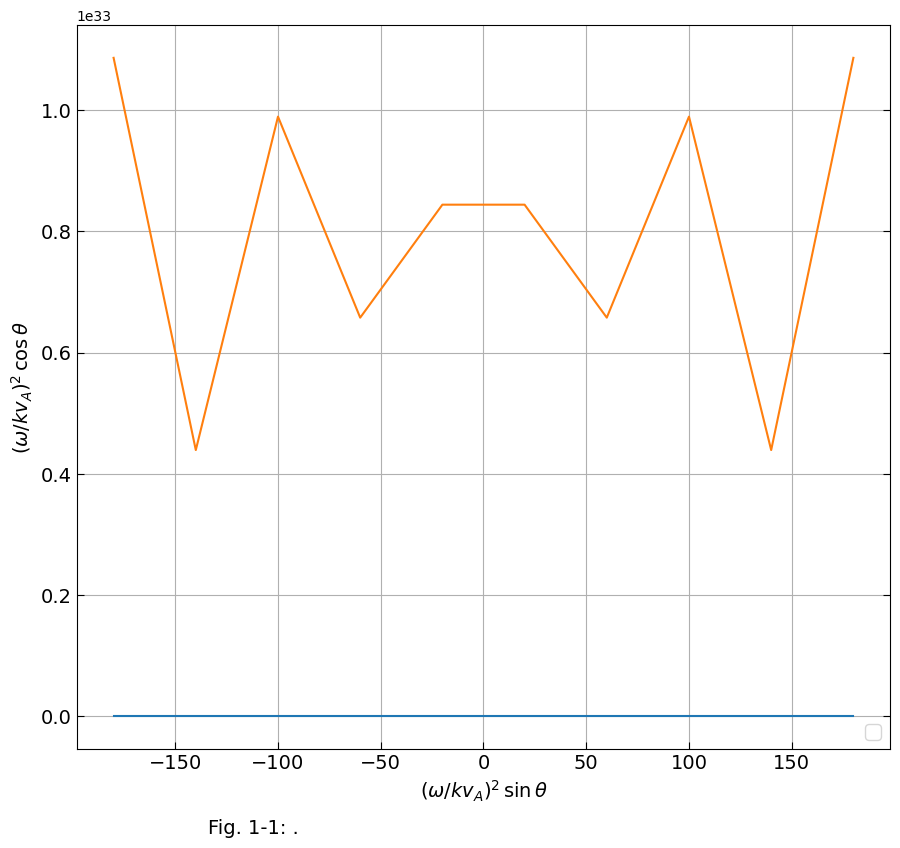

In [31]:
# define input parameters
inputs = {
    "B": 8.3e-9 * u.T,
    "ion": Particle("p+"),
    "k": np.logspace(-10, 10, 2) * u.rad / u.m,
    "n_i": 5 * u.m**-3,
    "T_e": 1.6e6 * u.K,
    "T_i": 4.0e5 * u.K,
    "theta": np.linspace(-180, 180, 10) * u.deg,
    "gamma_e": 3,
    "gamma_i": 3,
    "z_mean": 1,
}
print(inputs["theta"])
# calculate values
x = kinetic_alfven(**inputs)
print(x)

# define parameters for plots
fs = 14  # default font size
figwidth, figheight = plt.rcParams["figure.figsize"]
figheight = 1.6 * figheight
fig = plt.figure(figsize=[figwidth, figheight])

# adding labels and adjusting axis
plt.xlabel(r"Angle $\theta$", fontsize=fs)
plt.ylabel(r"$Kinetic Alfven$", fontsize=fs)

plt.tick_params(
    which="both",
    direction="in",
    labelsize=fs,
    right=True,
    length=5,
)

# plot caption
txt = f"Fig. 1-1: ."

# plot values for each given theta input

lists = sorted(x.items()) # sorted by key, return a list of tuples

xt, yt = zip(*lists)

plt.plot(xt, yt, )#label=str(round(angle)) + "°")


plt.figtext(0.25, 0.02, txt, ha="left", fontsize=fs)
plt.legend(loc="lower right", markerscale=1, fontsize=fs)
plt.grid()
plt.show()

## Wave Normal to the Surface

To calculate t